In [ ]:
#Data Source: PDFs parsed from https://coststudies.ucdavis.edu/current/commodities

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('UCD-data.csv')
df['true?'] = ((df['Labor Cost'] + df['Fuel'] + df['Lube & Repairs'] + df['Material Cost'] + df['Custom/Rent']) - df['Total Cost'])<2
filtered_df = df[df['true?'] == True]
filtered_df.to_csv('check.csv')

In [3]:
times_df = filtered_df.groupby("Product", as_index=False)["Time (Hrs./Ac)"].mean()

/var/folders/xj/3_cf3p513dxgf8tbpc4j_1j40000gn/T/ipykernel_31633/2051888399.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product", y="Time (Hrs./Ac)", data=times_df, palette="viridis")


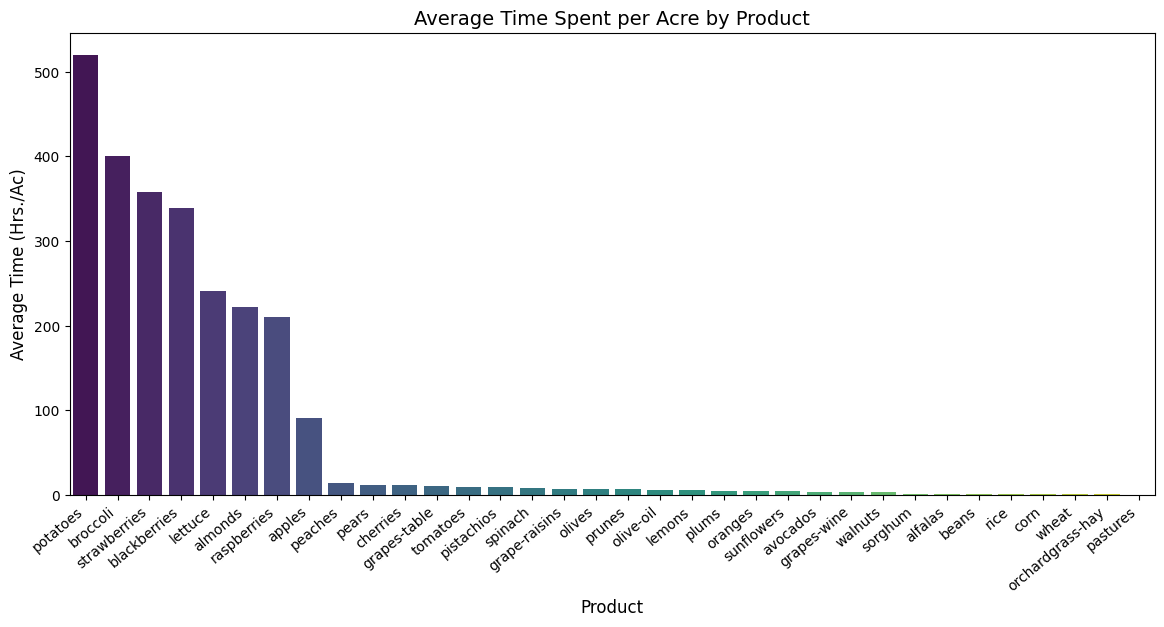

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

times_df = times_df.sort_values(by="Time (Hrs./Ac)", ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(x="Product", y="Time (Hrs./Ac)", data=times_df, palette="viridis")

plt.xlabel("Product", fontsize=12)
plt.ylabel("Average Time (Hrs./Ac)", fontsize=12)
plt.title("Average Time Spent per Acre by Product", fontsize=14)
plt.xticks(rotation=40, ha="right")  

plt.show()

In [5]:
cost_df = filtered_df.groupby("Product", as_index=False)[["Labor Cost", "Total Cost"]].sum()


In [6]:
cost_df

,Product,Labor Cost,Total Cost
0,alfalas,837.00,5961.00
1,almonds,2104.00,12308.00
2,apples,4440.00,7060.00
3,avocados,1863.00,10018.00
4,beans,569.22,2886.88
5,blackberries,28945.00,62179.00
6,broccoli,3942.00,14200.00
7,cherries,1273.00,2967.00
8,corn,409.00,2285.00
9,grape-raisins,2480.00,3646.00


/var/folders/xj/3_cf3p513dxgf8tbpc4j_1j40000gn/T/ipykernel_31633/2393409953.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Product", y="Ratio", data=cost_df, palette="coolwarm")


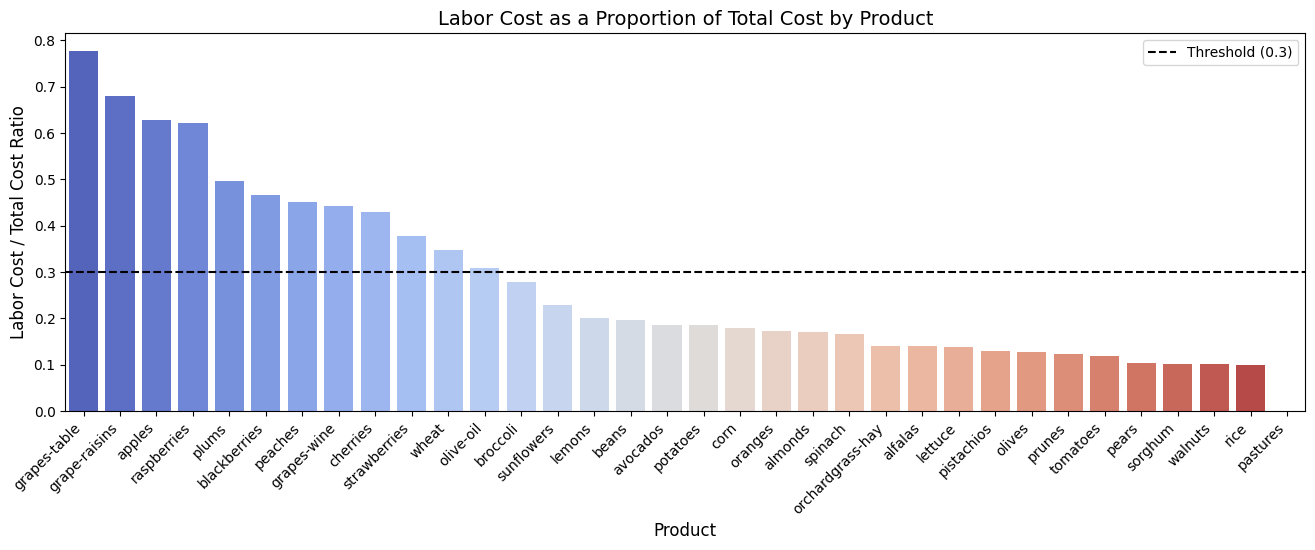

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

cost_df["Ratio"] = cost_df["Labor Cost"] / cost_df["Total Cost"]
cost_df = cost_df.sort_values(by="Ratio", ascending=False)

plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Product", y="Ratio", data=cost_df, palette="coolwarm")
plt.axhline(y=0.3, color='black', linestyle='dashed', linewidth=1.5, label="Threshold (0.3)")
plt.xticks(rotation=45, ha="right", fontsize=10)  
plt.subplots_adjust(bottom=0.25)  

plt.xlabel("Product", fontsize=12)
plt.ylabel("Labor Cost / Total Cost Ratio", fontsize=12)
plt.title("Labor Cost as a Proportion of Total Cost by Product", fontsize=14)
plt.legend()

plt.show()

In [ ]:
#articles in full review that had mixed votes previously

In [8]:
cost_df
#come up with weighted score, including acrage per crop and stuff. production per state? indicators for labor intensiveness

#look into social deprivation index

#https://www.graham-center.org/maps-data-tools/social-deprivation-index.html
"""
https://www.graham-center.org/maps-data-tools/social-deprivation-index.html
    take a bunch of data (like %undereducated, % of ppl living in bad housing, unemployed%), normalize it
    Apply factor analysis (dimension reducing technique, look for latent variance between variables)
    factor analysis basically report a weight of importance, which we multiply with z score to find fianl
    


The idea is that
social deprivation -> undereducation, bad housing, enemployment, etc
    
However, social deprivation is more abstraction of an index, cannot be measured

So we look at quantifiable values we believe is associated with it

? -> undereducation, bad housing, enemployment, etc
Then we work backwards to find social deprivation


So something similar with this?

labor intensivity -> ratio of labor to machine/total cost, number of workers, worker compensation, workers per acre



then we work backwards

How could we apply this to farm labor?
    1. find variables associated with manual labor (assuming the latent)
    
#how labor intensive a states labor intensivity is?

ratio of cost: calculate with acrage of various crops per state
    
    
    
"""

'\nhttps://www.graham-center.org/maps-data-tools/social-deprivation-index.html\n    take a bunch of data (like %undereducated, % of ppl living in bad housing, unemployed%), normalize it\n    Apply factor analysis (dimension reducing technique, look for latent variance between variables)\n    factor analysis basically report a weight of importance, which we multiply with z score to find fianl\n    \n\n\nThe idea is that\nsocial deprivation -> undereducation, bad housing, enemployment, etc\n    \nHowever, social deprivation is more abstraction of an index, cannot be measured\n\nSo we look at quantifiable values we believe is associated with it\n\n? -> undereducation, bad housing, enemployment, etc\nThen we work backwards to find social deprivation\n\n\nSo something similar with this?\n\nlabor intensivity -> ratio of labor to machine/total cost, number of workers, worker compensation, workers per acre\n\n\n\nthen we work backwards\n\nHow could we apply this to farm labor?\n    1. find var

In [9]:
#read in xiaoyu's number of workers

In [20]:
data = {}
years = [2012, 2013, 2014, 2017, 2018, 2019, 2022, 2023]
crop_to_products = {
    'GRAPES': ['grapes-table', 'grape-raisins', 'grapes-wine'],
    'APPLES': ['apples'],
    'GRAPES': ['grapes-table', 'grape-raisins', 'grapes-wine'],
    'RASPBERRIES': ['raspberries'],
    'PLUMS': ['plums'],
    'BLACKBERRIES': ['blackberries'],
    'PEACHES': ['peaches'],
    'CHERRIES': ['cherries'],
    'WHEAT': ['wheat'],
    'OLIVES': ['olives', 'olive-oil'],
    'BROCCOLI': ['broccoli'],
    'SUNFLOWER': ['sunflowers'],
    'LEMONS': ['lemons'],
    'BEANS': ['beans'],
    'AVOCADOS': ['avocados'],
    'POTATOES': ['potatoes'],
    'CORN': ['corn'],
    'ORANGES': ['oranges'],
    'ALMONDS': ['almonds'],
    'SPINACH': ['spinach'],
    'LETTUCE': ['lettuce'],
    'PISTACHIOS': ['pistachios'],
    'PRUNES': ['prunes'],
    'TOMATOES': ['tomatoes'],
    'PEARS': ['pears'],
    'SORGHUM': ['sorghum'],
    'WALNUTS': ['walnuts'],
    'RICE': ['rice']
}
columns_to_keep = ['state_name'] + list(crop_to_products.keys())


for year in years:
    df = pd.read_csv(f"../USDAstats/norm-data/{year}_raw_api.csv")
    filtered_columns = [col for col in columns_to_keep if col in df.columns]
    data[year] = df[filtered_columns]

In [21]:
"""perennial crops: live and produce for multiple years
annual crops: replanted every year

we should use area bearing for perennial crops,
and area harvested for annual crops
"""



crop_lifecycle = {
    'GRAPES': 'perennial',
    'APPLES': 'perennial',
    'RASPBERRIES': 'perennial',
    'PLUMS': 'perennial',
    'BLACKBERRIES': 'perennial',
    'PEACHES': 'perennial',
    'CHERRIES': 'perennial',
    'WHEAT': 'annual',
    'OLIVES': 'perennial',
    'BROCCOLI': 'annual',
    'SUNFLOWER': 'annual',
    'LEMONS': 'perennial',
    'BEANS': 'annual',
    'AVOCADOS': 'perennial',
    'POTATOES': 'annual',
    'CORN': 'annual',
    'ORANGES': 'perennial',
    'ALMONDS': 'perennial',
    'SPINACH': 'annual',
    'LETTUCE': 'annual',
    'PISTACHIOS': 'perennial',
    'PRUNES': 'perennial',
    'TOMATOES': 'annual',
    'PEARS': 'perennial',
    'SORGHUM': 'annual',
    'WALNUTS': 'perennial',
    'RICE': 'annual'
}


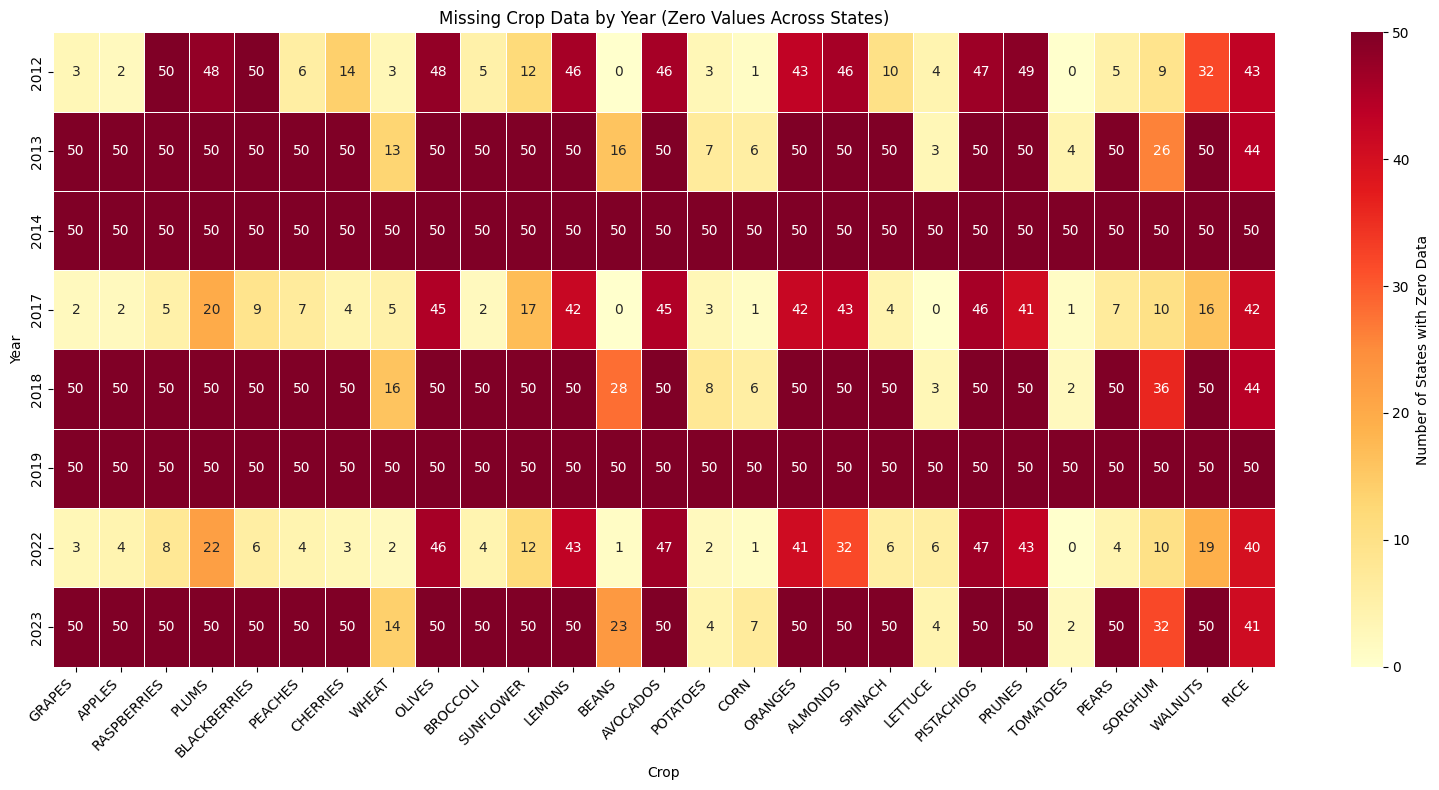

In [23]:
missing_counts = {}

for year, df in data.items():
    df = df.copy()

    # If df is empty, simulate 50 rows (1 per state) with zeros
    if df.empty:
        df = pd.DataFrame(columns=columns_to_keep)
        df['state_name'] = [f'State {i+1}' for i in range(50)]  # Placeholder state names
        for col in columns_to_keep:
            if col != 'state_name':
                df[col] = 0
    else:
        # Ensure all expected columns are present
        for col in columns_to_keep:
            if col not in df.columns:
                df[col] = 0

    # Keep only the relevant columns
    df = df[columns_to_keep]

    # Count zero values per crop (excluding 'state_name')
    zero_counts = (df.drop(columns='state_name') == 0).sum()
    missing_counts[year] = zero_counts

# Continue as before...
missing_df = pd.DataFrame(missing_counts).T
missing_df = missing_df.loc[:, missing_df.sum().sort_values(ascending=False).index]
missing_df = missing_df.fillna(0).astype(int)

# Reorder and plot
ordered_crops = list(crop_to_products.keys())
missing_df = missing_df[ordered_crops]

plt.figure(figsize=(16, 8))
sns.heatmap(
    missing_df,
    cmap='YlOrRd',
    annot=True,
    fmt='d',
    linewidths=0.5,
    cbar_kws={'label': 'Number of States with Zero Data'}
)
plt.title("Missing Crop Data by Year (Zero Values Across States)")
plt.xlabel("Crop")
plt.ylabel("Year")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [14]:
data[2022]

,state_name,WHEAT,BROCCOLI,SUNFLOWER,BEANS,POTATOES,CORN,SPINACH,LETTUCE,TOMATOES,SORGHUM,RICE
0,ALABAMA,1295458.0,61.0,159.0,3174598.0,10513.0,2724218.0,0.0,144.0,12690.0,14230.0,0.0
1,ALASKA,204.0,70.0,0.0,39.0,1356.0,0.0,9.0,346.0,8.0,0.0,0.0
2,ARIZONA,1957352.0,26440.0,0.0,18984.0,11063.0,1112769.0,21520.0,442780.0,288.0,75950.0,0.0
3,ARKANSAS,1745371.0,12.0,0.0,42396017.0,37350.0,8733159.0,28.0,158.0,5670.0,75730.0,13765096.0
4,CALIFORNIA,1963837.0,434133.0,468816.0,116301.0,391029.0,6244549.0,133856.0,2159468.0,3720489.0,126681.0,3696996.0
5,COLORADO,17609452.0,34.0,465149.0,420698.0,506900.0,12938481.0,24.0,3990.0,1858.0,2704395.0,0.0
6,CONNECTICUT,967.0,120.0,15.0,3850.0,843.0,171932.0,17.0,448.0,2835.0,0.0,0.0
7,DELAWARE,553872.0,20.0,0.0,1526919.0,2896.0,1826012.0,10.0,90.0,445.0,6770.0,0.0
8,FLORIDA,15804.0,5420.0,0.0,376335.0,176571.0,937623.0,950.0,23426.0,242305.0,5204.0,182133.0
9,GEORGIA,1442331.0,3730.0,2887.0,1462562.0,8881.0,4720801.0,25.0,82.0,14313.0,127237.0,0.0
